
1. Understanding the mathematics behind Activation functions

        1.1  Abs
        1.2  Clip
        1.3  Elu
        1.4  Exp
        1.5  TanH
        1.6  Sigmoid
        1.7  Softsign
        1.8  ReLU
        1.9  Leaky-ReLU
        1.10 PReLU
        1.11 Softplus
        1.12 Selu
        1.13 Glu
        1.14 Swish
        1.15 Softmax
        1.16 Logit
        
2. Studying the effect of activation functions in training a MNist classifier with all other hyper-parameters kept constant

        1.1 ReLU
        1.2 Leaky-ReLU
        1.3 TanH
        1.4 Sigmoid
        1.5 Elu
        1.6 Softsign
        1.7 Softplus
        

# 1. Understanding the mathematics behind Activation functions

In computational networks, the activation function of a node defines the output of that node given an input or set of inputs. A standard computer chip circuit can be seen as a digital network of activation functions that can be "ON" (1) or "OFF" (0), depending on input. This is similar to the behavior of the linear perceptron in neural networks. However, only nonlinear activation functions allow such networks to compute nontrivial problems using only a small number of nodes. In artificial neural networks this function is also called the transfer function. (Ref - Wiki)

Import all required libraries

In [4]:
from matplotlib import pyplot as plt            #Plotting the variables
import numpy as np                              #Numeric array operations
import time                                     #Clocking the cuntions 

from caffe2.python import core, workspace       #Core creates layers, workspace holds data  
from caffe2.proto import caffe2_pb2             #Save layers as files
print "Import Complete"

from IPython.display import Markdown

def printmd(string):
    display(Markdown(string))


Import Complete


## 1.1. Function: Abs

Function name: abs (Absolute)

Function formula: $$x_i = |x_i|\; \forall\; i\; in\; x$$

Function details: Returns an absolute value of every element of the input blob.

**Applying function: Absolute**

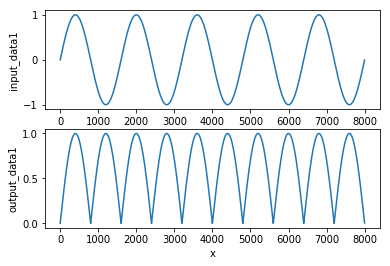

In [5]:
#Loading input data

Fs = 8000
f = 5
sample = 8000
x = np.arange(sample)
input_data1 = np.sin(2 * np.pi * f * x / Fs)

#Applying the operator

input_data1 = np.asarray(input_data1)
input_data1 = input_data1.astype(np.float32)          #Convert to float32 type         

#Reset the workspace
workspace.ResetWorkspace()

#Creating the operator
op = core.CreateOperator(
    "Abs",                                           # The type of operator that we want to run
    ["X"],                                           # Inputs
    ["Y"],                                           # Output
)

workspace.FeedBlob("X", input_data1)                #Load numpy data onto caffe2's workspace

workspace.RunOperatorOnce(op)                       #Running the operator once

output_data1 = workspace.FetchBlob("Y")             #Fetching the data back


printmd("**Applying function: Absolute**")
plt.subplot(2, 1, 1)
plt.plot(x, input_data1)
plt.xlabel('x')
plt.ylabel('input_data1')

plt.subplot(2, 1, 2)
plt.plot(x, output_data1)
plt.xlabel('x')
plt.ylabel('output_data1')
plt.show()

## 1.2. Function: Clip

Function name: clip (Clipping)

Function details: Clip a range of values using pre-assigned maxima and minima.

**Applying Function: Clip**

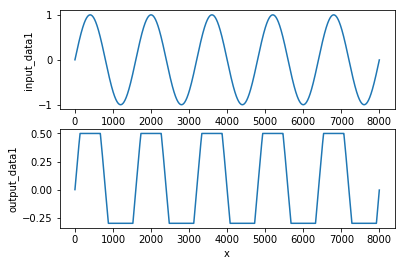

In [6]:
# Reset the workspace
workspace.ResetWorkspace()

#Loading input data

Fs = 8000
f = 5
sample = 8000
x = np.arange(sample)
input_data1 = np.sin(2 * np.pi * f * x / Fs)

#Applying the operator

input_data1 = np.asarray(input_data1)
input_data1 = input_data1.astype(np.float32)          #Convert to float32 type         

op = core.CreateOperator(
    "Clip",                                           # The type of operator that we want to run
    ["X"],                                            # Inputs
    ["Y"],                                            # Output
    min = -0.3,                                        # Any value below min will be clipped to min
    max = 0.5,                                        # Any value above max will be clipped to max
)

workspace.FeedBlob("X", input_data1)                #Load numpy data onto caffe2's workspace

workspace.RunOperatorOnce(op)                       #Running the operator once

output_data1 = workspace.FetchBlob("Y")             #Fetching the data back

printmd("**Applying Function: Clip**")
plt.subplot(2, 1, 1)
plt.plot(x, input_data1)
plt.xlabel('x')
plt.ylabel('input_data1')

plt.subplot(2, 1, 2)
plt.plot(x, output_data1)
plt.xlabel('x')
plt.ylabel('output_data1')
plt.show()

## 1.3. Function: Elu

Function name: elu (Exponential Linear Unit)

Function formula: <math>f(x) = \begin{cases} 
x & \mbox{if } x \geq 0 \\ 
a(e^x-1) & \mbox{otherwise}
\end{cases}</math>
 
                  a is a hyper-parameter


Function details: Exponential linear units try to make the mean activations closer to zero which speeds up learning. It has been shown that ELUs can obtain higher classification accuracy than ReLUs (Ref: Wiki)

**Applying Function: Exponential Linear Unit**

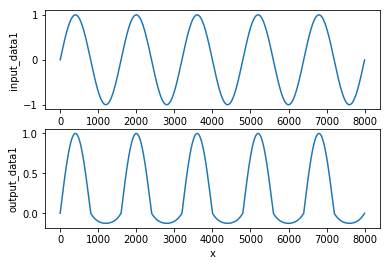

In [7]:
#Reset the workspace
workspace.ResetWorkspace()

#Loading input data

Fs = 8000
f = 5
sample = 8000
x = np.arange(sample)
input_data1 = np.sin(2 * np.pi * f * x / Fs)

#Applying the operator

input_data1 = np.asarray(input_data1)
input_data1 = input_data1.astype(np.float32)          #Convert to float32 type         

op = core.CreateOperator(
    "Elu",                                            # The type of operator that we want to run
    ["X"],                                            # Inputs
    ["Y"],                                            # Output
    alpha=0.2,                                        # Constant "a"
)

workspace.FeedBlob("X", input_data1)                #Load numpy data onto caffe2's workspace

workspace.RunOperatorOnce(op)                       #Running the operator once

output_data1 = workspace.FetchBlob("Y")             #Fetching the data back

printmd("**Applying Function: Exponential Linear Unit**")
plt.subplot(2, 1, 1)
plt.plot(x, input_data1)
plt.xlabel('x')
plt.ylabel('input_data1')

plt.subplot(2, 1, 2)
plt.plot(x, output_data1)
plt.xlabel('x')
plt.ylabel('output_data1')
plt.show()

# 1.4. Function: Exp

Function name: exp (Exponential Function)

Function formula: $$f(x) = e^x$$
 
Function details: Computes exponential value for every element in the input blob.

**Applying Function: Exponential**

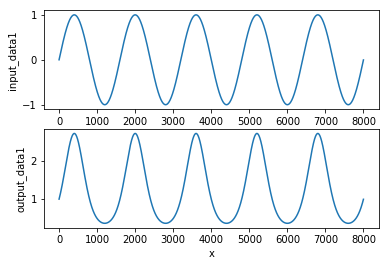

In [11]:
#Reset the workspace
workspace.ResetWorkspace()

#Loading input data

Fs = 8000
f = 5
sample = 8000
x = np.arange(sample)
input_data1 = np.sin(2 * np.pi * f * x / Fs)

#Applying the operator

input_data1 = np.asarray(input_data1)
input_data1 = input_data1.astype(np.float32)          #Convert to float32 type         

op = core.CreateOperator(
    "Exp",                                            # The type of operator that we want to run
    ["X"],                                            # Inputs
    ["Y"],                                            # Output
)

workspace.FeedBlob("X", input_data1)                #Load numpy data onto caffe2's workspace

workspace.RunOperatorOnce(op)                       #Running the operator once

output_data1 = workspace.FetchBlob("Y")             #Fetching the data back

printmd("**Applying Function: Exponential**")
plt.subplot(2, 1, 1)
plt.plot(x, input_data1)
plt.xlabel('x')
plt.ylabel('input_data1')

plt.subplot(2, 1, 2)
plt.plot(x, output_data1)
plt.xlabel('x')
plt.ylabel('output_data1')
plt.show()

# 1.5. Function: TanH

Function name: tanh (Hyperbolic tangent Function)

Function formula: $$f(x) = \tanh{x}$$
 
Function details: The tanh function is mainly used classification between two classes. The advantage is that the negative inputs will be mapped strongly negative and the zero inputs will be mapped near zero in the tanh graph. (Ref-Wiki)

**Applying Function: Hyperbolic-Tangent**

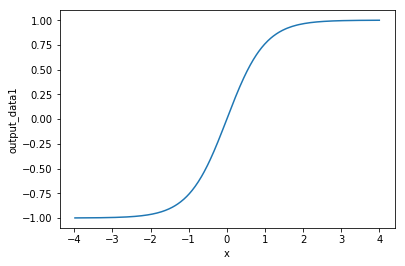

In [12]:
#Reset the workspace
workspace.ResetWorkspace()

#Loading input data
x = np.random.uniform(-4,4,1000)
input_data1 = np.sort(x) 

#Applying the operator

input_data1 = np.asarray(input_data1)
input_data1 = input_data1.astype(np.float32)          #Convert to float32 type         

op = core.CreateOperator(
    "Tanh",                                            # The type of operator that we want to run
    ["X"],                                            # Inputs
    ["Y"],                                            # Output
)

workspace.FeedBlob("X", input_data1)                #Load numpy data onto caffe2's workspace

workspace.RunOperatorOnce(op)                       #Running the operator once

output_data1 = workspace.FetchBlob("Y")             #Fetching the data back

printmd("**Applying Function: Hyperbolic-Tangent**")
plt.plot(input_data1, output_data1)
plt.xlabel('x')
plt.ylabel('output_data1')
plt.show()

# 1.6. Function: Sigmoid

Function name: sigmoid (Sigmoid Function)

Function formula: $$f(x) = e^x/(1+e^x)$$
 
Function details:  it is especially used for models where we have to predict the probability as an output.Since probability of anything exists only between the range of 0 and 1, sigmoid is the right choice. (Ref-Wiki)

**Applying Function: Sigmoid**

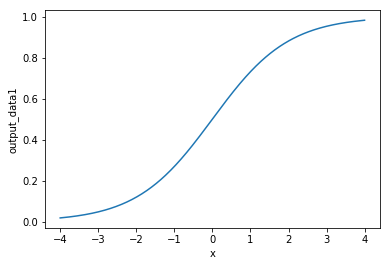

In [13]:
#Reset the workspace
workspace.ResetWorkspace()

#Loading input data
x = np.random.uniform(-4,4,1000)
input_data1 = np.sort(x) 

#Applying the operator

input_data1 = np.asarray(input_data1)
input_data1 = input_data1.astype(np.float32)          #Convert to float32 type         

op = core.CreateOperator(
    "Sigmoid",                                            # The type of operator that we want to run
    ["X"],                                            # Inputs
    ["Y"],                                            # Output
)

workspace.FeedBlob("X", input_data1)                #Load numpy data onto caffe2's workspace

workspace.RunOperatorOnce(op)                       #Running the operator once

output_data1 = workspace.FetchBlob("Y")             #Fetching the data back

printmd("**Applying Function: Sigmoid**")
plt.plot(input_data1, output_data1)
plt.xlabel('x')
plt.ylabel('output_data1')
plt.show()

# 1.7. Function: Softsign

Function name: softsign (softsign Function)

Function formula: 

$$f(x) = x/(1+|x|)$$
 
Function details: The soft sign function is another nonlinearity which can be considered an alternative to tanh since it too does not saturate as easily as hard clipped functions. (Ref-Quora)

**Applying Function: Softsign**

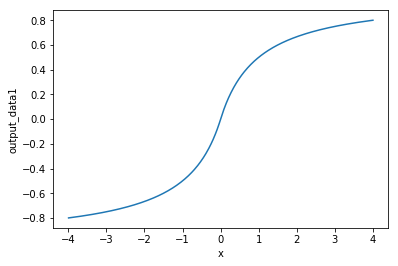

In [14]:
#Reset the workspace
workspace.ResetWorkspace()

#Loading input data
x = np.random.uniform(-4,4,1000)
input_data1 = np.sort(x) 

#Applying the operator

input_data1 = np.asarray(input_data1)
input_data1 = input_data1.astype(np.float32)          #Convert to float32 type         

op = core.CreateOperator(
    "Softsign",                                            # The type of operator that we want to run
    ["X"],                                            # Inputs
    ["Y"],                                            # Output
)

workspace.FeedBlob("X", input_data1)                #Load numpy data onto caffe2's workspace

workspace.RunOperatorOnce(op)                       #Running the operator once

output_data1 = workspace.FetchBlob("Y")             #Fetching the data back

printmd("**Applying Function: Softsign**")
plt.plot(input_data1, output_data1)
plt.xlabel('x')
plt.ylabel('output_data1')
plt.show()

## 1.8. Function: Relu

Function name: relu (Rectified Linear Unit Function)

Function formula: <math>f(x)  = \begin{cases}
    x & \mbox{if } x > 0 \\
    0 & \mbox{otherwise}
\end{cases}</math>
 
Function details: This is also known as a ramp function and is analogous to half-wave rectification in electrical engineering. It has been demonstrated for the first time in 2011 to enable better training of deeper networks, compared to the widely used activation functions prior to 2011, i.e., the logistic sigmoid and its more practical counterpart, the hyperbolic tangent. (Ref-Wiki)

**Applying Function: Rectified Linear Unit Function**

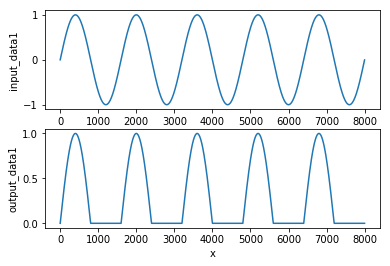

In [15]:
#Reset the workspace
workspace.ResetWorkspace()

#Loading input data
Fs = 8000
f = 5
sample = 8000
x = np.arange(sample)
input_data1 = np.sin(2 * np.pi * f * x / Fs)

#Applying the operator

input_data1 = np.asarray(input_data1)
input_data1 = input_data1.astype(np.float32)          #Convert to float32 type         

op = core.CreateOperator(
    "Relu",                                            # The type of operator that we want to run
    ["X"],                                            # Inputs
    ["Y"],                                            # Output
)

workspace.FeedBlob("X", input_data1)                #Load numpy data onto caffe2's workspace

workspace.RunOperatorOnce(op)                       #Running the operator once

output_data1 = workspace.FetchBlob("Y")             #Fetching the data back

printmd("**Applying Function: Rectified Linear Unit Function**")
plt.subplot(2, 1, 1)
plt.plot(x, input_data1)
plt.xlabel('x')
plt.ylabel('input_data1')

plt.subplot(2, 1, 2)
plt.plot(x, output_data1)
plt.xlabel('x')
plt.ylabel('output_data1')
plt.show()

## 1.9. Function: Leaky-Relu

Function name: leaky-relu (Leaky Rectified Linear Unit Function)

Function formula: <math>f(x)  = \begin{cases}
    x & \mbox{if } x > 0 \\
    \alpha*x & \mbox{otherwise}
\end{cases}</math>
 
Function details: Leaky ReLUs allow a small, non-zero gradient when the unit is not active. Better than ReLUs as they remove the problem of dying features. 

**Applying Function: Leaky Rectified Linear Unit Function**

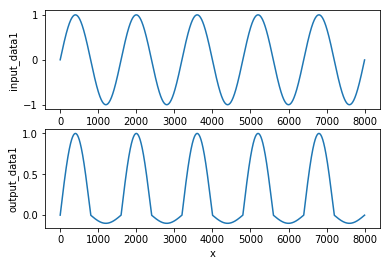

In [16]:
#Reset the workspace
workspace.ResetWorkspace()

#Loading input data

Fs = 8000
f = 5
sample = 8000
x = np.arange(sample)
input_data1 = np.sin(2 * np.pi * f * x / Fs)

#Applying the operator

input_data1 = np.asarray(input_data1)
input_data1 = input_data1.astype(np.float32)          #Convert to float32 type         

op = core.CreateOperator(
    "LeakyRelu",                                            # The type of operator that we want to run
    ["X"],                                            # Inputs
    ["Y"],                                            # Output
    alpha=0.1,                                        # Constant
)

workspace.FeedBlob("X", input_data1)                #Load numpy data onto caffe2's workspace

workspace.RunOperatorOnce(op)                       #Running the operator once

output_data1 = workspace.FetchBlob("Y")             #Fetching the data back

printmd("**Applying Function: Leaky Rectified Linear Unit Function**")
plt.subplot(2, 1, 1)
plt.plot(x, input_data1)
plt.xlabel('x')
plt.ylabel('input_data1')

plt.subplot(2, 1, 2)
plt.plot(x, output_data1)
plt.xlabel('x')
plt.ylabel('output_data1')
plt.show()

# 1.10. Function: P-Relu

Function name: p-relu (Leaky Rectified Linear Unit Function)

Function formula: <math>f(x)  = \begin{cases}
    x & \mbox{if } x > 0 \\
    slope*x & \mbox{otherwise}
\end{cases}</math>
 
Function details: Leaky ReLUs allow a small, non-zero gradient when the unit is not active. Parametric ReLUs take this idea further by making the coefficient of leakage into a parameter that is learned along with the other neural network parameters.

**Applying Function: PReLU**

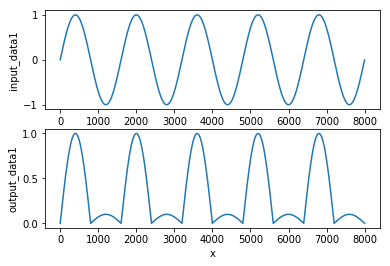

In [17]:
# Reset the workspace
workspace.ResetWorkspace()

#Loading input data

Fs = 8000
f = 5
sample = 8000
x = np.arange(sample)
input_data1 = np.sin(2 * np.pi * f * x / Fs)

input_data2 = [-0.1]
input_data2 = np.asarray(input_data2)
input_data2 = input_data2.astype(np.float32)

#Applying the operator

input_data1 = np.asarray(input_data1)
input_data1 = input_data1.astype(np.float32)          #Convert to float32 type         

op = core.CreateOperator(
    "PRelu",                                            # The type of operator that we want to run
    ["X", "S"],                                            # Inputs
    ["Y"],                                            # Output
    alpha=0.1,                                        # Constant
)

workspace.FeedBlob("X", input_data1)                #Load numpy data onto caffe2's workspace
workspace.FeedBlob("S", input_data2)

workspace.RunOperatorOnce(op)                       #Running the operator once

output_data1 = workspace.FetchBlob("Y")             #Fetching the data back

printmd("**Applying Function: PReLU**")
plt.subplot(2, 1, 1)
plt.plot(x, input_data1)
plt.xlabel('x')
plt.ylabel('input_data1')

plt.subplot(2, 1, 2)
plt.plot(x, output_data1)
plt.xlabel('x')
plt.ylabel('output_data1')
plt.show()

# 1.11. Function: Softplus

Function name: softplus (Softplus Rectified Linear Unit Function)

Function formula: 

$$f(x)=\log(1+e^x)$$
 
Function details: Also known as analytic function, is a smooth approximation to the rectified linear unit function.  (Ref-Wiki)

**Applying Function: Softplus**

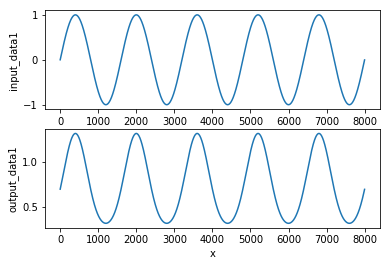

In [18]:
# Reset the workspace
workspace.ResetWorkspace()

#Loading input data

Fs = 8000
f = 5
sample = 8000
x = np.arange(sample)
input_data1 = np.sin(2 * np.pi * f * x / Fs)

#Applying the operator

input_data1 = np.asarray(input_data1)
input_data1 = input_data1.astype(np.float32)          #Convert to float32 type         

op = core.CreateOperator(
    "Softplus",                                            # The type of operator that we want to run
    ["X"],                                            # Inputs
    ["Y"],                                            # Output
)

workspace.FeedBlob("X", input_data1)                #Load numpy data onto caffe2's workspace

workspace.RunOperatorOnce(op)                       #Running the operator once

output_data1 = workspace.FetchBlob("Y")             #Fetching the data back

printmd("**Applying Function: Softplus**")
plt.subplot(2, 1, 1)
plt.plot(x, input_data1)
plt.xlabel('x')
plt.ylabel('input_data1')

plt.subplot(2, 1, 2)
plt.plot(x, output_data1)
plt.xlabel('x')
plt.ylabel('output_data1')
plt.show()

# 1.12. Function: Selu

Function name: selu (Scaled Exponential Linear Unit)

Function formula: <math>f(x) = \begin{cases} 
scale*x & \mbox{if } x \geq 0 \\ 
scale*a*(e^x-1) & \mbox{otherwise}
\end{cases}</math>
 
                  a is a hyper-parameter


Function details:Scaled version of Elu Activation function

**Applying Function: Scaled Exponential Linear Unit**

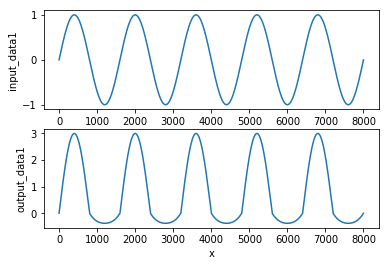

In [19]:
# Reset the workspace
workspace.ResetWorkspace()

#Loading input data

Fs = 8000
f = 5
sample = 8000
x = np.arange(sample)
input_data1 = np.sin(2 * np.pi * f * x / Fs)

#Applying the operator

input_data1 = np.asarray(input_data1)
input_data1 = input_data1.astype(np.float32)          #Convert to float32 type         

op = core.CreateOperator(
    "Selu",                                            # The type of operator that we want to run
    ["X"],                                            # Inputs
    ["Y"],                                            # Output
    alpha=0.2,                                        # Constant "a"
    scale=3.0,
)

workspace.FeedBlob("X", input_data1)                #Load numpy data onto caffe2's workspace

workspace.RunOperatorOnce(op)                       #Running the operator once

output_data1 = workspace.FetchBlob("Y")             #Fetching the data back

printmd("**Applying Function: Scaled Exponential Linear Unit**")
plt.subplot(2, 1, 1)
plt.plot(x, input_data1)
plt.xlabel('x')
plt.ylabel('input_data1')

plt.subplot(2, 1, 2)
plt.plot(x, output_data1)
plt.xlabel('x')
plt.ylabel('output_data1')
plt.show()

# 1.13. Function: Glu

Function name: glu (Gated Linear Unit)

Function details:Applies gated linear unit to the input Tensor X. The output Y is half the size of the input X

In [20]:
#Reset the workspace
workspace.ResetWorkspace()

#Loading input data

input_data1 = [1.0, 3.0, -5.0, 3.0, -11.0, 0.5]
input_data1 = np.asarray(input_data1)
input_data1 = input_data1.astype(np.float32)

#Applying the operator

input_data1 = np.asarray(input_data1)
input_data1 = input_data1.astype(np.float32)          #Convert to float32 type         

op = core.CreateOperator(
    "Glu",                                            # The type of operator that we want to run
    ["X"],                                            # Inputs
    ["Y"],                                            # Output
)

workspace.FeedBlob("X", input_data1)                #Load numpy data onto caffe2's workspace

workspace.RunOperatorOnce(op)                       #Running the operator once

output_data1 = workspace.FetchBlob("Y")             #Fetching the data back

printmd("**Applying Function: Gated Linear Unit**")
print("Current blobs in the workspace: {}\n".format(workspace.Blobs()))
print("X:\n{}\n".format(workspace.FetchBlob("X")))
print("Y:\n{}\n".format(workspace.FetchBlob("Y")))

**Applying Function: Gated Linear Unit**

Current blobs in the workspace: [u'X', u'Y']

X:
[  1.    3.   -5.    3.  -11.    0.5]

Y:
[ 9.5257413e-01  5.0104267e-05 -3.1122968e+00]



# 14. Function: Swish

Function name: swish (Swish Exponential Linear Unit)

Function formula: $$f(x) = x*[e^x/(1+e^x)]$$


Function details:The Google Brain team has just released a new paper (https://arxiv.org/abs/1710.05941) that demonstrates the superiority of a new activation function called Swish on a number of different neural network architectures. (Ref - lazyprogrammer.me)

Applying function: Swish


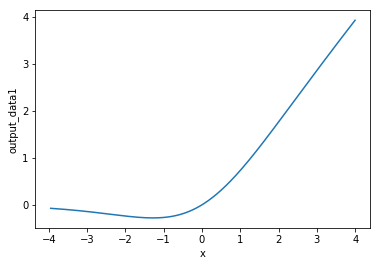

In [21]:
#Reset the workspace
workspace.ResetWorkspace()

#Loading input data

x = np.random.uniform(-4,4,1000)
input_data1 = np.sort(x) 

#Applying the operator

input_data1 = np.asarray(input_data1)
input_data1 = input_data1.astype(np.float32)          #Convert to float32 type         

op = core.CreateOperator(
    "Swish",                                            # The type of operator that we want to run
    ["X"],                                            # Inputs
    ["Y"],                                            # Output
)

workspace.FeedBlob("X", input_data1)                #Load numpy data onto caffe2's workspace

workspace.RunOperatorOnce(op)                       #Running the operator once

output_data1 = workspace.FetchBlob("Y")             #Fetching the data back

print("Applying function: Swish")
plt.plot(input_data1, output_data1)
plt.xlabel('x')
plt.ylabel('output_data1')
plt.show()

# 15. Function: Softmax

Function name: softmax (Softmax Function)

Function formula: 

$$f(x_i) = e^x_i/(\sum{e^x_i})$$
 
Function details: The softmax function, or normalized exponential function,  calculates the probabilities distribution of the event over ‘n’ different events. In general way of saying, this function will calculate the probabilities of each target class over all possible target classes. Later the calculated probabilities will be helpful for determining the target class for the given inputs. (Ref-DataAspirant)

**Applying Function: Softmax**

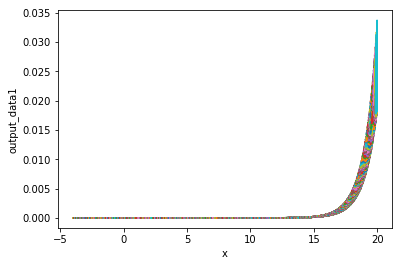

In [22]:
#Reset the workspace
workspace.ResetWorkspace()

#Loading input data

x = np.random.uniform(-4,20,(1000,1000))
input_data1 = np.sort(x) 

#Applying the operator
input_data1 = np.asarray(input_data1)
input_data1 = input_data1.astype(np.float32)          #Convert to float32 type         

op = core.CreateOperator(
    "Softmax",                                            # The type of operator that we want to run
    ["X"],                                            # Inputs
    ["Y"],                                            # Output
)

workspace.FeedBlob("X", input_data1)                #Load numpy data onto caffe2's workspace

workspace.RunOperatorOnce(op)                       #Running the operator once

output_data1 = workspace.FetchBlob("Y")             #Fetching the data back

printmd("**Applying Function: Softmax**")
plt.plot(input_data1, output_data1)
plt.xlabel('x')
plt.ylabel('output_data1')
plt.show()

# 16. Function: Logit

Function name: logit (Logit Function)

Function formula: 

$$f(x_i) = \log[x/(1-x)]$$, for x>0
 
Function details: The logit function is the inverse of the sigmoidal "logistic" function or logistic transform used in mathematics, especially in statistics. When the function's variable represents a probability p, the logit function gives the log-odds, or the logarithm of the odds p/(1 − p). (Ref-Wiki)

**Applying Functions: Logit**

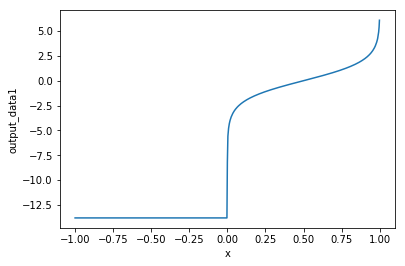

In [23]:
#Reset the workspace
workspace.ResetWorkspace()

#Loading input data

x = np.random.uniform(-1,1,1000)
input_data1 = np.sort(x) 

#Applying the operator

input_data1 = np.asarray(input_data1)
input_data1 = input_data1.astype(np.float32)          #Convert to float32 type         

op = core.CreateOperator(
    "Logit",                                            # The type of operator that we want to run
    ["X"],                                            # Inputs
    ["Y"],                                            # Output
)

workspace.FeedBlob("X", input_data1)                #Load numpy data onto caffe2's workspace

workspace.RunOperatorOnce(op)                       #Running the operator once

output_data1 = workspace.FetchBlob("Y")             #Fetching the data back

printmd("**Applying Functions: Logit**")
plt.plot(input_data1, output_data1)
plt.xlabel('x')
plt.ylabel('output_data1')
plt.show()

# 2. Studying the effect of activation functions in training a MNist classifier with all other hyper-parameters kept constant

**Ignore the following hyperparameters**:

1. Learning Rate

2. SGD Optimizer

3. Gradient Operators

4. Cross Entropy Loss

5. Momentum

6. Batch Size

7. Number of Iterations


*Note: The final activation function is kept fixed - softmax*

In [25]:
# Import and define all pre-requisites

from matplotlib import pyplot
import numpy as np
import os
import shutil
import caffe2.python.predictor.predictor_exporter as pe
from caffe2.python import (
    brew,
    core,
    model_helper,
    net_drawer,
    optimizer,
    visualize,
    workspace,
)
from IPython.display import Markdown
from ipy_table import *
# If you would like to see some really detailed initializations,
# you can change --caffe2_log_level=0 to --caffe2_log_level=-1
core.GlobalInit(['caffe2', '--caffe2_log_level=0'])
print("Necessities imported!")
# If True, a more complicated convolutional model is used
# If False, a multilayer perceptron model is used
USE_LENET_MODEL = True


current_folder = os.path.join(os.path.expanduser('~'), 'caffe2_notebooks')
data_folder = os.path.join(current_folder, 'tutorial_data', 'mnist')
root_folder = os.path.join(current_folder, 'tutorial_files', 'tutorial_mnist')
db_missing = False

def AddInput(model, batch_size, db, db_type):
    # load the data
    data_uint8, label = brew.db_input(
        model,
        blobs_out=["data_uint8", "label"],
        batch_size=batch_size,
        db=db,
        db_type=db_type,
    )
    # cast the data to float
    data = model.Cast(data_uint8, "data", to=core.DataType.FLOAT)
    # scale data from [0,255] down to [0,1]
    data = model.Scale(data, data, scale=float(1./256))
    # don't need the gradient for the backward pass
    data = model.StopGradient(data, data)
    return data, label

def AddAccuracy(model, softmax, label):
    """Adds an accuracy op to the model"""
    accuracy = model.Accuracy([softmax, label], "accuracy")
    return accuracy

def printmd(string):
    display(Markdown(string))
    
    
base_lr = 0.001
m_high = 0.9
def AddTrainingOperators(model, softmax, label):
    xent = model.LabelCrossEntropy([softmax, label], 'xent')
    loss = model.AveragedLoss(xent, "loss")
    AddAccuracy(model, softmax, label)
    model.AddGradientOperators([loss])
    optimizer.build_sgd(
        model,
        nesterov=1,
        momentum=m_high,
        base_learning_rate=base_lr,
        policy="step",
        stepsize=1,
        gamma=0.999,
    )
arg_scope = {"order": "NCHW"}


Necessities imported!


## 2.1 Applying Function: ReLU on Mnist classifier

**Training status: Running**  Wait till the process is completed

    Completed iterations: 0 , Total iterations to be completed: 2000
    Completed iterations: 100 , Total iterations to be completed: 2000
    Completed iterations: 200 , Total iterations to be completed: 2000
    Completed iterations: 300 , Total iterations to be completed: 2000
    Completed iterations: 400 , Total iterations to be completed: 2000
    Completed iterations: 500 , Total iterations to be completed: 2000
    Completed iterations: 600 , Total iterations to be completed: 2000
    Completed iterations: 700 , Total iterations to be completed: 2000
    Completed iterations: 800 , Total iterations to be completed: 2000
    Completed iterations: 900 , Total iterations to be completed: 2000
    Completed iterations: 1000 , Total iterations to be completed: 2000
    Completed iterations: 1100 , Total iterations to be completed: 2000
    Completed iterations: 1200 , Total iterations to be completed: 2000
    Completed iterations: 1300 , Total iterations to be completed: 2000
    

**Training status: Completed**

**Testing status: Running**  Wait till the process is completed

    Completed test set: 0 , Total sets to be tested: 1000
    Completed test set: 100 , Total sets to be tested: 1000
    Completed test set: 200 , Total sets to be tested: 1000
    Completed test set: 300 , Total sets to be tested: 1000
    Completed test set: 400 , Total sets to be tested: 1000
    Completed test set: 500 , Total sets to be tested: 1000
    Completed test set: 600 , Total sets to be tested: 1000
    Completed test set: 700 , Total sets to be tested: 1000
    Completed test set: 800 , Total sets to be tested: 1000
    Completed test set: 900 , Total sets to be tested: 1000


**Testing status: Completed**

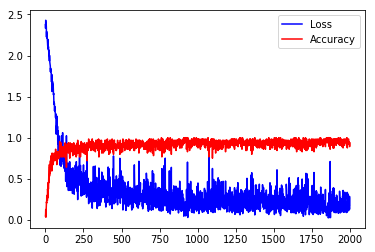

In [26]:
def AddLeNetModel_relu(model, data):
    '''
    This part is the standard LeNet model: from data to the softmax prediction.
    
    For each convolutional layer we specify dim_in - number of input channels
    and dim_out - number or output channels. Also each Conv and MaxPool layer changes the
    image size. For example, kernel of size 5 reduces each side of an image by 4.

    While when we have kernel and stride sizes equal 2 in a MaxPool layer, it divides
    each side in half.
    '''
    # Image size: 28 x 28 -> 24 x 24
    conv1 = brew.conv(model, data, 'conv1', dim_in=1, dim_out=20, kernel=5)
    # Image size: 24 x 24 -> 12 x 12
    pool1 = model.net.MaxPool(conv1, 'pool1', kernel=2, stride=2)
    # Image size: 12 x 12 -> 8 x 8
    conv2 = brew.conv(model, pool1, 'conv2', dim_in=20, dim_out=50, kernel=5)
    # Image size: 8 x 8 -> 4 x 4
    pool2 = model.net.MaxPool(conv2, 'pool2', kernel=2, stride=2)
    # 50 * 4 * 4 stands for dim_out from previous layer multiplied by the image size
    fc3 = brew.fc(model, pool2, 'fc3', dim_in=50 * 4 * 4, dim_out=500)
    fc3 = model.net.Relu(fc3, 'relu3')
    pred = brew.fc(model, fc3, 'pred', 500, 10)
    softmax = model.net.Softmax(pred, 'softmax')
    return softmax


train_model = model_helper.ModelHelper(name="mnist_train", arg_scope=arg_scope)
data, label = AddInput(
    train_model, batch_size=64,
    db=os.path.join(data_folder, 'mnist-train-nchw-lmdb'),
    db_type='lmdb')
softmax = AddLeNetModel_relu(train_model, data)
AddTrainingOperators(train_model, softmax, label)
workspace.ResetWorkspace()
workspace.RunNetOnce(train_model.param_init_net)
workspace.CreateNet(train_model.net, overwrite=True)
total_iters_relu = 2000
accuracy_relu = np.zeros(total_iters_relu)
loss_relu = np.zeros(total_iters_relu)
printmd('**Training status: Running**  Wait till the process is completed')
for i in range(total_iters_relu):
    if(i%100 == 0):
        print "    Completed iterations:", i, ", Total iterations to be completed:", total_iters_relu
    workspace.RunNet(train_model.net)
    accuracy_relu[i] = workspace.blobs['accuracy']
    loss_relu[i] = workspace.blobs['loss']
#print "Training completed"
printmd('**Training status: Completed**')

#print "Testing status: Running"
printmd('**Testing status: Running**  Wait till the process is completed')
test_model = model_helper.ModelHelper(
    name="mnist_test", arg_scope=arg_scope, init_params=False)
data, label = AddInput(
    test_model, batch_size=100,
    db=os.path.join(data_folder, 'mnist-test-nchw-lmdb'),
    db_type='lmdb')
softmax = AddLeNetModel_relu(test_model, data)
AddAccuracy(test_model, softmax, label)
workspace.RunNetOnce(test_model.param_init_net)
workspace.CreateNet(test_model.net, overwrite=True)
test_iters_relu = 1000
test_accuracy_relu = np.zeros(test_iters_relu)
for i in range(test_iters_relu):
    if(i%100 == 0):
        print "    Completed test set:", i, ", Total sets to be tested:", test_iters_relu
    workspace.RunNet(test_model.net.Proto().name)
    test_accuracy_relu[i] = workspace.FetchBlob('accuracy')
#print "Testing completed"
printmd('**Testing status: Completed**')
# After the execution is done, let's plot the values.
pyplot.plot(loss_relu, 'b')
pyplot.plot(accuracy_relu, 'r')
pyplot.legend(('Loss', 'Accuracy'), loc='upper right')

In [27]:
printmd('**Effects of activation functions**')

solvers = [
    ['Activation Type', 'Num iterations', 'Init LR', 'Init Loss', 'Final Loss', 'Init Training-Acc(%)', \
     'Final Training-Acc(%)', 'Final Testing-Acc(%)'],
    ['ReLU', total_iters_relu, base_lr, loss_relu[0], loss_relu[total_iters_relu-1], accuracy_relu[0]*100, \
     accuracy_relu[total_iters_relu-1]*100, np.mean(test_accuracy_relu)*100],

];
make_table(solvers)
apply_theme('basic')

**Effects of activation functiond**

Activation Type,Num iterations,Init LR,Init Loss,Final Loss,Init Training-Acc(%),Final Training-Acc(%),Final Testing-Acc(%)
SGD,2000,0.0010,2.3760,0.1348,4.6875,93.7500,94.7700


## 2.2. Applying Function: Leaky-ReLU on Mnist classifier

**Training status: Running**  Wait till the process is completed

    Completed iterations: 0 , Total iterations to be completed: 2000
    Completed iterations: 100 , Total iterations to be completed: 2000
    Completed iterations: 200 , Total iterations to be completed: 2000
    Completed iterations: 300 , Total iterations to be completed: 2000
    Completed iterations: 400 , Total iterations to be completed: 2000
    Completed iterations: 500 , Total iterations to be completed: 2000
    Completed iterations: 600 , Total iterations to be completed: 2000
    Completed iterations: 700 , Total iterations to be completed: 2000
    Completed iterations: 800 , Total iterations to be completed: 2000
    Completed iterations: 900 , Total iterations to be completed: 2000
    Completed iterations: 1000 , Total iterations to be completed: 2000
    Completed iterations: 1100 , Total iterations to be completed: 2000
    Completed iterations: 1200 , Total iterations to be completed: 2000
    Completed iterations: 1300 , Total iterations to be completed: 2000
    

**Training status: Completed**

**Testing status: Running**  Wait till the process is completed

    Completed test set: 0 , Total sets to be tested: 1000
    Completed test set: 100 , Total sets to be tested: 1000
    Completed test set: 200 , Total sets to be tested: 1000
    Completed test set: 300 , Total sets to be tested: 1000
    Completed test set: 400 , Total sets to be tested: 1000
    Completed test set: 500 , Total sets to be tested: 1000
    Completed test set: 600 , Total sets to be tested: 1000
    Completed test set: 700 , Total sets to be tested: 1000
    Completed test set: 800 , Total sets to be tested: 1000
    Completed test set: 900 , Total sets to be tested: 1000


**Testing status: Completed**

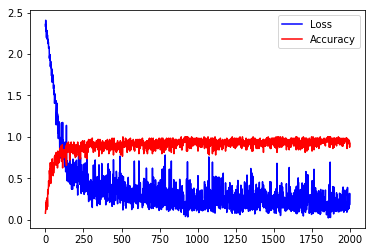

In [44]:
def AddLeNetModel_lrelu(model, data):
    '''
    This part is the standard LeNet model: from data to the softmax prediction.
    
    For each convolutional layer we specify dim_in - number of input channels
    and dim_out - number or output channels. Also each Conv and MaxPool layer changes the
    image size. For example, kernel of size 5 reduces each side of an image by 4.

    While when we have kernel and stride sizes equal 2 in a MaxPool layer, it divides
    each side in half.
    '''
    # Image size: 28 x 28 -> 24 x 24
    conv1 = brew.conv(model, data, 'conv1', dim_in=1, dim_out=20, kernel=5)
    # Image size: 24 x 24 -> 12 x 12
    pool1 = model.net.MaxPool(conv1, 'pool1', kernel=2, stride=2)
    # Image size: 12 x 12 -> 8 x 8
    conv2 = brew.conv(model, pool1, 'conv2', dim_in=20, dim_out=50, kernel=5)
    # Image size: 8 x 8 -> 4 x 4
    pool2 = model.net.MaxPool(conv2, 'pool2', kernel=2, stride=2)
    # 50 * 4 * 4 stands for dim_out from previous layer multiplied by the image size
    fc3 = brew.fc(model, pool2, 'fc3', dim_in=50 * 4 * 4, dim_out=500)
    fc3 = model.net.LeakyRelu(fc3, 'frelu', alpha=0.1)
    pred = brew.fc(model, fc3, 'pred', 500, 10)
    softmax = model.net.Softmax(pred, 'softmax')
    return softmax


train_model = model_helper.ModelHelper(name="mnist_train", arg_scope=arg_scope)
data, label = AddInput(
    train_model, batch_size=64,
    db=os.path.join(data_folder, 'mnist-train-nchw-lmdb'),
    db_type='lmdb')
softmax = AddLeNetModel_lrelu(train_model, data)

AddTrainingOperators(train_model, softmax, label)
workspace.ResetWorkspace()
workspace.RunNetOnce(train_model.param_init_net)

workspace.CreateNet(train_model.net, overwrite=True)
total_iters_lrelu = 2000
accuracy_lrelu = np.zeros(total_iters_lrelu)
loss_lrelu = np.zeros(total_iters_lrelu)
printmd('**Training status: Running**  Wait till the process is completed')
for i in range(total_iters_lrelu):
    if(i%100 == 0):
        print "    Completed iterations:", i, ", Total iterations to be completed:", total_iters_lrelu
    workspace.RunNet(train_model.net)
    accuracy_lrelu[i] = workspace.blobs['accuracy']
    loss_lrelu[i] = workspace.blobs['loss']
#print "Training completed"
printmd('**Training status: Completed**')

#print "Testing status: Running"
printmd('**Testing status: Running**  Wait till the process is completed')
test_model = model_helper.ModelHelper(
    name="mnist_test", arg_scope=arg_scope, init_params=False)
data, label = AddInput(
    test_model, batch_size=100,
    db=os.path.join(data_folder, 'mnist-test-nchw-lmdb'),
    db_type='lmdb')
softmax = AddLeNetModel_lrelu(test_model, data)
AddAccuracy(test_model, softmax, label)
workspace.RunNetOnce(test_model.param_init_net)
workspace.CreateNet(test_model.net, overwrite=True)
test_iters_lrelu = 1000
test_accuracy_lrelu = np.zeros(test_iters_lrelu)
for i in range(test_iters_lrelu):
    if(i%100 == 0):
        print "    Completed test set:", i, ", Total sets to be tested:", test_iters_lrelu
    workspace.RunNet(test_model.net.Proto().name)
    test_accuracy_lrelu[i] = workspace.FetchBlob('accuracy')
#print "Testing completed"
printmd('**Testing status: Completed**')
# After the execution is done, let's plot the values.
pyplot.plot(loss_lrelu, 'b')
pyplot.plot(accuracy_lrelu, 'r')
pyplot.legend(('Loss', 'Accuracy'), loc='upper right')


**Effects of activation functions**

Activation Type,Num iterations,Init LR,Init Loss,Final Loss,Init Training-Acc(%),Final Training-Acc(%),Final Testing-Acc(%)
ReLU,2000,0.0010,2.3760,0.1348,4.6875,93.7500,94.7700
Leaky-ReLU,2000,0.0010,2.3561,0.1881,7.8125,92.1875,94.2300


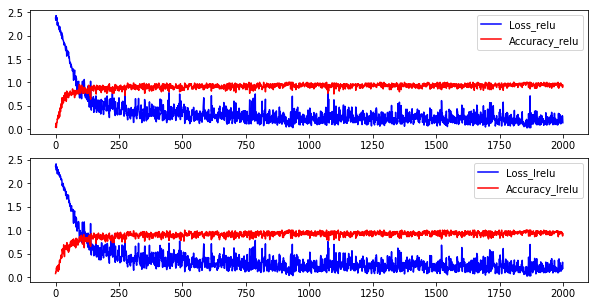

In [45]:
printmd('**Effects of activation functions**')

pyplot.figure(figsize=(10, 5))
pyplot.subplot(2,1,1)
pyplot.plot(loss_relu, 'b')
pyplot.plot(accuracy_relu, 'r')
pyplot.legend(('Loss_relu', 'Accuracy_relu'), loc='upper right')


pyplot.subplot(2,1,2)
pyplot.plot(loss_lrelu, 'b')
pyplot.plot(accuracy_lrelu, 'r')
pyplot.legend(('Loss_lrelu', 'Accuracy_lrelu'), loc='upper right')

solvers = [
    ['Activation Type', 'Num iterations', 'Init LR', 'Init Loss', 'Final Loss', 'Init Training-Acc(%)', \
     'Final Training-Acc(%)', 'Final Testing-Acc(%)'],
    ['ReLU', total_iters_relu, base_lr, loss_relu[0], loss_relu[total_iters_relu-1], accuracy_relu[0]*100, \
     accuracy_relu[total_iters_relu-1]*100, np.mean(test_accuracy_relu)*100],
    ['Leaky-ReLU', total_iters_lrelu, base_lr, loss_lrelu[0], loss_lrelu[total_iters_lrelu-1], \
     accuracy_lrelu[0]*100, accuracy_lrelu[total_iters_lrelu-1]*100, np.mean(test_accuracy_lrelu)*100]

];
make_table(solvers)
apply_theme('basic')

## 2.3. Applying Function: TanH on Mnist classifier

**Training status: Running**  Wait till the process is completed

    Completed iterations: 0 , Total iterations to be completed: 2000
    Completed iterations: 100 , Total iterations to be completed: 2000
    Completed iterations: 200 , Total iterations to be completed: 2000
    Completed iterations: 300 , Total iterations to be completed: 2000
    Completed iterations: 400 , Total iterations to be completed: 2000
    Completed iterations: 500 , Total iterations to be completed: 2000
    Completed iterations: 600 , Total iterations to be completed: 2000
    Completed iterations: 700 , Total iterations to be completed: 2000
    Completed iterations: 800 , Total iterations to be completed: 2000
    Completed iterations: 900 , Total iterations to be completed: 2000
    Completed iterations: 1000 , Total iterations to be completed: 2000
    Completed iterations: 1100 , Total iterations to be completed: 2000
    Completed iterations: 1200 , Total iterations to be completed: 2000
    Completed iterations: 1300 , Total iterations to be completed: 2000
    

**Training status: Completed**

**Testing status: Running**  Wait till the process is completed

    Completed test set: 0 , Total sets to be tested: 1000
    Completed test set: 100 , Total sets to be tested: 1000
    Completed test set: 200 , Total sets to be tested: 1000
    Completed test set: 300 , Total sets to be tested: 1000
    Completed test set: 400 , Total sets to be tested: 1000
    Completed test set: 500 , Total sets to be tested: 1000
    Completed test set: 600 , Total sets to be tested: 1000
    Completed test set: 700 , Total sets to be tested: 1000
    Completed test set: 800 , Total sets to be tested: 1000
    Completed test set: 900 , Total sets to be tested: 1000


**Testing status: Completed**

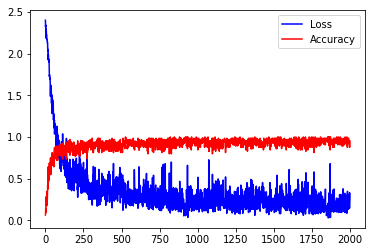

In [46]:
def AddLeNetModel_tanh(model, data):
    '''
    This part is the standard LeNet model: from data to the softmax prediction.
    
    For each convolutional layer we specify dim_in - number of input channels
    and dim_out - number or output channels. Also each Conv and MaxPool layer changes the
    image size. For example, kernel of size 5 reduces each side of an image by 4.

    While when we have kernel and stride sizes equal 2 in a MaxPool layer, it divides
    each side in half.
    '''
    # Image size: 28 x 28 -> 24 x 24
    conv1 = brew.conv(model, data, 'conv1', dim_in=1, dim_out=20, kernel=5)
    # Image size: 24 x 24 -> 12 x 12
    pool1 = model.net.MaxPool(conv1, 'pool1', kernel=2, stride=2)
    # Image size: 12 x 12 -> 8 x 8
    conv2 = brew.conv(model, pool1, 'conv2', dim_in=20, dim_out=50, kernel=5)
    # Image size: 8 x 8 -> 4 x 4
    pool2 = model.net.MaxPool(conv2, 'pool2', kernel=2, stride=2)
    # 50 * 4 * 4 stands for dim_out from previous layer multiplied by the image size
    fc3 = brew.fc(model, pool2, 'fc3', dim_in=50 * 4 * 4, dim_out=500)
    fc3 = model.net.Tanh(fc3, 'tanh')
    pred = brew.fc(model, fc3, 'pred', 500, 10)
    softmax = model.net.Softmax(pred, 'softmax')
    return softmax


train_model = model_helper.ModelHelper(name="mnist_train", arg_scope=arg_scope)
data, label = AddInput(
    train_model, batch_size=64,
    db=os.path.join(data_folder, 'mnist-train-nchw-lmdb'),
    db_type='lmdb')
softmax = AddLeNetModel_tanh(train_model, data)

AddTrainingOperators(train_model, softmax, label)
workspace.ResetWorkspace()
workspace.RunNetOnce(train_model.param_init_net)

workspace.CreateNet(train_model.net, overwrite=True)
total_iters_tanh = 2000
accuracy_tanh = np.zeros(total_iters_tanh)
loss_tanh = np.zeros(total_iters_tanh)
printmd('**Training status: Running**  Wait till the process is completed')
for i in range(total_iters_tanh):
    if(i%100 == 0):
        print "    Completed iterations:", i, ", Total iterations to be completed:", total_iters_tanh
    workspace.RunNet(train_model.net)
    accuracy_tanh[i] = workspace.blobs['accuracy']
    loss_tanh[i] = workspace.blobs['loss']
#print "Training completed"
printmd('**Training status: Completed**')

#print "Testing status: Running"
printmd('**Testing status: Running**  Wait till the process is completed')
test_model = model_helper.ModelHelper(
    name="mnist_test", arg_scope=arg_scope, init_params=False)
data, label = AddInput(
    test_model, batch_size=100,
    db=os.path.join(data_folder, 'mnist-test-nchw-lmdb'),
    db_type='lmdb')
softmax = AddLeNetModel_tanh(test_model, data)
AddAccuracy(test_model, softmax, label)
workspace.RunNetOnce(test_model.param_init_net)
workspace.CreateNet(test_model.net, overwrite=True)
test_iters_tanh = 1000
test_accuracy_tanh = np.zeros(test_iters_tanh)
for i in range(test_iters_tanh):
    if(i%100 == 0):
        print "    Completed test set:", i, ", Total sets to be tested:", test_iters_tanh
    workspace.RunNet(test_model.net.Proto().name)
    test_accuracy_tanh[i] = workspace.FetchBlob('accuracy')
#print "Testing completed"
printmd('**Testing status: Completed**')
# After the execution is done, let's plot the values.
pyplot.plot(loss_tanh, 'b')
pyplot.plot(accuracy_tanh, 'r')
pyplot.legend(('Loss', 'Accuracy'), loc='upper right')


**Effects of activation functions**

Activation Type,Num iterations,Init LR,Init Loss,Final Loss,Init Training-Acc(%),Final Training-Acc(%),Final Testing-Acc(%)
ReLU,2000,0.0010,2.3760,0.1348,4.6875,93.7500,94.7700
Leaky-ReLU,2000,0.0010,2.3561,0.1881,7.8125,92.1875,94.2300
TanH,2000,0.0010,2.4014,0.1518,6.2500,95.3125,94.8000


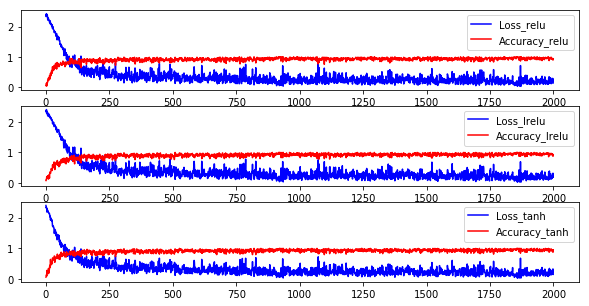

In [47]:
printmd('**Effects of activation functions**')

pyplot.figure(figsize=(10, 5))
pyplot.subplot(3,1,1)
pyplot.plot(loss_relu, 'b')
pyplot.plot(accuracy_relu, 'r')
pyplot.legend(('Loss_relu', 'Accuracy_relu'), loc='upper right')


pyplot.subplot(3,1,2)
pyplot.plot(loss_lrelu, 'b')
pyplot.plot(accuracy_lrelu, 'r')
pyplot.legend(('Loss_lrelu', 'Accuracy_lrelu'), loc='upper right')

pyplot.subplot(3,1,3)
pyplot.plot(loss_tanh, 'b')
pyplot.plot(accuracy_tanh, 'r')
pyplot.legend(('Loss_tanh', 'Accuracy_tanh'), loc='upper right')


solvers = [
    ['Activation Type', 'Num iterations', 'Init LR', 'Init Loss', 'Final Loss', 'Init Training-Acc(%)', \
     'Final Training-Acc(%)', 'Final Testing-Acc(%)'],
    ['ReLU', total_iters_relu, base_lr, loss_relu[0], loss_relu[total_iters_relu-1], accuracy_relu[0]*100, \
     accuracy_relu[total_iters_relu-1]*100, np.mean(test_accuracy_relu)*100],
    ['Leaky-ReLU', total_iters_lrelu, base_lr, loss_lrelu[0], loss_lrelu[total_iters_lrelu-1], \
     accuracy_lrelu[0]*100, accuracy_lrelu[total_iters_lrelu-1]*100, np.mean(test_accuracy_lrelu)*100],
    ['TanH', total_iters_tanh, base_lr, loss_tanh[0], loss_tanh[total_iters_tanh-1], \
     accuracy_tanh[0]*100, accuracy_tanh[total_iters_tanh-1]*100, np.mean(test_accuracy_tanh)*100]

];
make_table(solvers)
apply_theme('basic')

## 2.4. Applying Function: Sigmoid on Mnist classifier

**Training status: Running**  Wait till the process is completed

    Completed iterations: 0 , Total iterations to be completed: 2000
    Completed iterations: 100 , Total iterations to be completed: 2000
    Completed iterations: 200 , Total iterations to be completed: 2000
    Completed iterations: 300 , Total iterations to be completed: 2000
    Completed iterations: 400 , Total iterations to be completed: 2000
    Completed iterations: 500 , Total iterations to be completed: 2000
    Completed iterations: 600 , Total iterations to be completed: 2000
    Completed iterations: 700 , Total iterations to be completed: 2000
    Completed iterations: 800 , Total iterations to be completed: 2000
    Completed iterations: 900 , Total iterations to be completed: 2000
    Completed iterations: 1000 , Total iterations to be completed: 2000
    Completed iterations: 1100 , Total iterations to be completed: 2000
    Completed iterations: 1200 , Total iterations to be completed: 2000
    Completed iterations: 1300 , Total iterations to be completed: 2000
    

**Training status: Completed**

**Testing status: Running**  Wait till the process is completed

    Completed test set: 0 , Total sets to be tested: 1000
    Completed test set: 100 , Total sets to be tested: 1000
    Completed test set: 200 , Total sets to be tested: 1000
    Completed test set: 300 , Total sets to be tested: 1000
    Completed test set: 400 , Total sets to be tested: 1000
    Completed test set: 500 , Total sets to be tested: 1000
    Completed test set: 600 , Total sets to be tested: 1000
    Completed test set: 700 , Total sets to be tested: 1000
    Completed test set: 800 , Total sets to be tested: 1000
    Completed test set: 900 , Total sets to be tested: 1000


**Testing status: Completed**

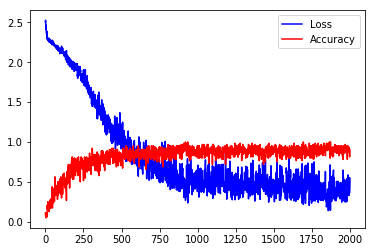

In [48]:
def AddLeNetModel_sigmoid(model, data):
    '''
    This part is the standard LeNet model: from data to the softmax prediction.
    
    For each convolutional layer we specify dim_in - number of input channels
    and dim_out - number or output channels. Also each Conv and MaxPool layer changes the
    image size. For example, kernel of size 5 reduces each side of an image by 4.

    While when we have kernel and stride sizes equal 2 in a MaxPool layer, it divides
    each side in half.
    '''
    # Image size: 28 x 28 -> 24 x 24
    conv1 = brew.conv(model, data, 'conv1', dim_in=1, dim_out=20, kernel=5)
    # Image size: 24 x 24 -> 12 x 12
    pool1 = model.net.MaxPool(conv1, 'pool1', kernel=2, stride=2)
    # Image size: 12 x 12 -> 8 x 8
    conv2 = brew.conv(model, pool1, 'conv2', dim_in=20, dim_out=50, kernel=5)
    # Image size: 8 x 8 -> 4 x 4
    pool2 = model.net.MaxPool(conv2, 'pool2', kernel=2, stride=2)
    # 50 * 4 * 4 stands for dim_out from previous layer multiplied by the image size
    fc3 = brew.fc(model, pool2, 'fc3', dim_in=50 * 4 * 4, dim_out=500)
    fc3 = model.net.Sigmoid(fc3, 'sigmoid')
    pred = brew.fc(model, fc3, 'pred', 500, 10)
    softmax = model.net.Softmax(pred, 'softmax')
    return softmax


train_model = model_helper.ModelHelper(name="mnist_train", arg_scope=arg_scope)
data, label = AddInput(
    train_model, batch_size=64,
    db=os.path.join(data_folder, 'mnist-train-nchw-lmdb'),
    db_type='lmdb')
softmax = AddLeNetModel_sigmoid(train_model, data)

AddTrainingOperators(train_model, softmax, label)
workspace.ResetWorkspace()
workspace.RunNetOnce(train_model.param_init_net)

workspace.CreateNet(train_model.net, overwrite=True)
total_iters_sigmoid = 2000
accuracy_sigmoid = np.zeros(total_iters_sigmoid)
loss_sigmoid = np.zeros(total_iters_sigmoid)
printmd('**Training status: Running**  Wait till the process is completed')
for i in range(total_iters_sigmoid):
    if(i%100 == 0):
        print "    Completed iterations:", i, ", Total iterations to be completed:", total_iters_sigmoid
    workspace.RunNet(train_model.net)
    accuracy_sigmoid[i] = workspace.blobs['accuracy']
    loss_sigmoid[i] = workspace.blobs['loss']
#print "Training completed"
printmd('**Training status: Completed**')

#print "Testing status: Running"
printmd('**Testing status: Running**  Wait till the process is completed')
test_model = model_helper.ModelHelper(
    name="mnist_test", arg_scope=arg_scope, init_params=False)
data, label = AddInput(
    test_model, batch_size=100,
    db=os.path.join(data_folder, 'mnist-test-nchw-lmdb'),
    db_type='lmdb')
softmax = AddLeNetModel_sigmoid(test_model, data)
AddAccuracy(test_model, softmax, label)
workspace.RunNetOnce(test_model.param_init_net)
workspace.CreateNet(test_model.net, overwrite=True)
test_iters_sigmoid = 1000
test_accuracy_sigmoid = np.zeros(test_iters_sigmoid)
for i in range(test_iters_sigmoid):
    if(i%100 == 0):
        print "    Completed test set:", i, ", Total sets to be tested:", test_iters_sigmoid
    workspace.RunNet(test_model.net.Proto().name)
    test_accuracy_sigmoid[i] = workspace.FetchBlob('accuracy')
#print "Testing completed"
printmd('**Testing status: Completed**')
# After the execution is done, let's plot the values.
pyplot.plot(loss_sigmoid, 'b')
pyplot.plot(accuracy_sigmoid, 'r')
pyplot.legend(('Loss', 'Accuracy'), loc='upper right')

**Effects of activation functions**

Activation Type,Num iterations,Init LR,Init Loss,Final Loss,Init Training-Acc(%),Final Training-Acc(%),Final Testing-Acc(%)
ReLU,2000,0.0010,2.3760,0.1348,4.6875,93.7500,94.7700
Leaky-ReLU,2000,0.0010,2.3561,0.1881,7.8125,92.1875,94.2300
TanH,2000,0.0010,2.4014,0.1518,6.2500,95.3125,94.8000
Sigmoid,2000,0.0010,2.5049,0.3694,10.9375,90.6250,90.1000


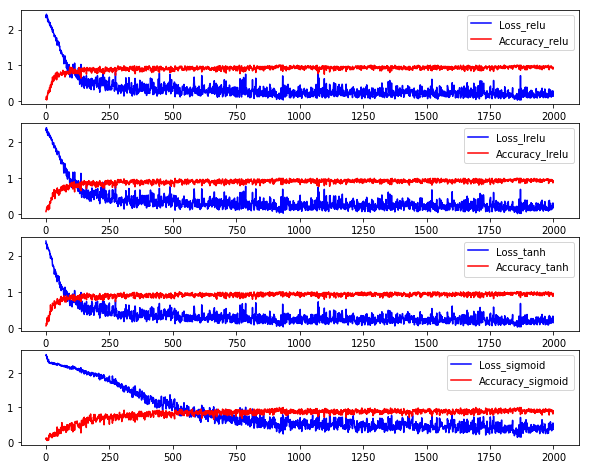

In [49]:
printmd('**Effects of activation functions**')

pyplot.figure(figsize=(10, 8))
pyplot.subplot(4,1,1)
pyplot.plot(loss_relu, 'b')
pyplot.plot(accuracy_relu, 'r')
pyplot.legend(('Loss_relu', 'Accuracy_relu'), loc='upper right')


pyplot.subplot(4,1,2)
pyplot.plot(loss_lrelu, 'b')
pyplot.plot(accuracy_lrelu, 'r')
pyplot.legend(('Loss_lrelu', 'Accuracy_lrelu'), loc='upper right')

pyplot.subplot(4,1,3)
pyplot.plot(loss_tanh, 'b')
pyplot.plot(accuracy_tanh, 'r')
pyplot.legend(('Loss_tanh', 'Accuracy_tanh'), loc='upper right')


pyplot.subplot(4,1,4)
pyplot.plot(loss_sigmoid, 'b')
pyplot.plot(accuracy_sigmoid, 'r')
pyplot.legend(('Loss_sigmoid', 'Accuracy_sigmoid'), loc='upper right')


solvers = [
    ['Activation Type', 'Num iterations', 'Init LR', 'Init Loss', 'Final Loss', 'Init Training-Acc(%)', \
     'Final Training-Acc(%)', 'Final Testing-Acc(%)'],
    ['ReLU', total_iters_relu, base_lr, loss_relu[0], loss_relu[total_iters_relu-1], accuracy_relu[0]*100, \
     accuracy_relu[total_iters_relu-1]*100, np.mean(test_accuracy_relu)*100],
    ['Leaky-ReLU', total_iters_lrelu, base_lr, loss_lrelu[0], loss_lrelu[total_iters_lrelu-1], \
     accuracy_lrelu[0]*100, accuracy_lrelu[total_iters_lrelu-1]*100, np.mean(test_accuracy_lrelu)*100],
    ['TanH', total_iters_tanh, base_lr, loss_tanh[0], loss_tanh[total_iters_tanh-1], \
     accuracy_tanh[0]*100, accuracy_tanh[total_iters_tanh-1]*100, np.mean(test_accuracy_tanh)*100],
    ['Sigmoid', total_iters_sigmoid, base_lr, loss_sigmoid[0], loss_sigmoid[total_iters_sigmoid-1], \
     accuracy_sigmoid[0]*100, accuracy_sigmoid[total_iters_sigmoid-1]*100, np.mean(test_accuracy_sigmoid)*100]

];
make_table(solvers)
apply_theme('basic')

## 2.5. Applying Function: Elu on Mnist classifier

**Training status: Running**  Wait till the process is completed

    Completed iterations: 0 , Total iterations to be completed: 2000
    Completed iterations: 100 , Total iterations to be completed: 2000
    Completed iterations: 200 , Total iterations to be completed: 2000
    Completed iterations: 300 , Total iterations to be completed: 2000
    Completed iterations: 400 , Total iterations to be completed: 2000
    Completed iterations: 500 , Total iterations to be completed: 2000
    Completed iterations: 600 , Total iterations to be completed: 2000
    Completed iterations: 700 , Total iterations to be completed: 2000
    Completed iterations: 800 , Total iterations to be completed: 2000
    Completed iterations: 900 , Total iterations to be completed: 2000
    Completed iterations: 1000 , Total iterations to be completed: 2000
    Completed iterations: 1100 , Total iterations to be completed: 2000
    Completed iterations: 1200 , Total iterations to be completed: 2000
    Completed iterations: 1300 , Total iterations to be completed: 2000
    

**Training status: Completed**

**Testing status: Running**  Wait till the process is completed

    Completed test set: 0 , Total sets to be tested: 1000
    Completed test set: 100 , Total sets to be tested: 1000
    Completed test set: 200 , Total sets to be tested: 1000
    Completed test set: 300 , Total sets to be tested: 1000
    Completed test set: 400 , Total sets to be tested: 1000
    Completed test set: 500 , Total sets to be tested: 1000
    Completed test set: 600 , Total sets to be tested: 1000
    Completed test set: 700 , Total sets to be tested: 1000
    Completed test set: 800 , Total sets to be tested: 1000
    Completed test set: 900 , Total sets to be tested: 1000


**Testing status: Completed**

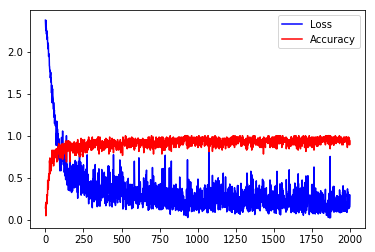

In [50]:
def AddLeNetModel_elu(model, data):
    '''
    This part is the standard LeNet model: from data to the softmax prediction.
    
    For each convolutional layer we specify dim_in - number of input channels
    and dim_out - number or output channels. Also each Conv and MaxPool layer changes the
    image size. For example, kernel of size 5 reduces each side of an image by 4.

    While when we have kernel and stride sizes equal 2 in a MaxPool layer, it divides
    each side in half.
    '''
    # Image size: 28 x 28 -> 24 x 24
    conv1 = brew.conv(model, data, 'conv1', dim_in=1, dim_out=20, kernel=5)
    # Image size: 24 x 24 -> 12 x 12
    pool1 = model.net.MaxPool(conv1, 'pool1', kernel=2, stride=2)
    # Image size: 12 x 12 -> 8 x 8
    conv2 = brew.conv(model, pool1, 'conv2', dim_in=20, dim_out=50, kernel=5)
    # Image size: 8 x 8 -> 4 x 4
    pool2 = model.net.MaxPool(conv2, 'pool2', kernel=2, stride=2)
    # 50 * 4 * 4 stands for dim_out from previous layer multiplied by the image size
    fc3 = brew.fc(model, pool2, 'fc3', dim_in=50 * 4 * 4, dim_out=500)
    fc3 = model.net.Elu(fc3, 'elu')
    pred = brew.fc(model, fc3, 'pred', 500, 10)
    softmax = model.net.Softmax(pred, 'softmax')
    return softmax


train_model = model_helper.ModelHelper(name="mnist_train", arg_scope=arg_scope)
data, label = AddInput(
    train_model, batch_size=64,
    db=os.path.join(data_folder, 'mnist-train-nchw-lmdb'),
    db_type='lmdb')
softmax = AddLeNetModel_elu(train_model, data)

AddTrainingOperators(train_model, softmax, label)
workspace.ResetWorkspace()
workspace.RunNetOnce(train_model.param_init_net)

workspace.CreateNet(train_model.net, overwrite=True)
total_iters_elu = 2000
accuracy_elu = np.zeros(total_iters_elu)
loss_elu = np.zeros(total_iters_elu)
printmd('**Training status: Running**  Wait till the process is completed')
for i in range(total_iters_elu):
    if(i%100 == 0):
        print "    Completed iterations:", i, ", Total iterations to be completed:", total_iters_elu
    workspace.RunNet(train_model.net)
    accuracy_elu[i] = workspace.blobs['accuracy']
    loss_elu[i] = workspace.blobs['loss']
#print "Training completed"
printmd('**Training status: Completed**')

#print "Testing status: Running"
printmd('**Testing status: Running**  Wait till the process is completed')
test_model = model_helper.ModelHelper(
    name="mnist_test", arg_scope=arg_scope, init_params=False)
data, label = AddInput(
    test_model, batch_size=100,
    db=os.path.join(data_folder, 'mnist-test-nchw-lmdb'),
    db_type='lmdb')
softmax = AddLeNetModel_elu(test_model, data)
AddAccuracy(test_model, softmax, label)
workspace.RunNetOnce(test_model.param_init_net)
workspace.CreateNet(test_model.net, overwrite=True)
test_iters_elu = 1000
test_accuracy_elu = np.zeros(test_iters_elu)
for i in range(test_iters_elu):
    if(i%100 == 0):
        print "    Completed test set:", i, ", Total sets to be tested:", test_iters_elu
    workspace.RunNet(test_model.net.Proto().name)
    test_accuracy_elu[i] = workspace.FetchBlob('accuracy')
#print "Testing completed"
printmd('**Testing status: Completed**')
# After the execution is done, let's plot the values.
pyplot.plot(loss_elu, 'b')
pyplot.plot(accuracy_elu, 'r')
pyplot.legend(('Loss', 'Accuracy'), loc='upper right')

**Effects of activation functions**

Activation Type,Num iterations,Init LR,Init Loss,Final Loss,Init Training-Acc(%),Final Training-Acc(%),Final Testing-Acc(%)
ReLU,2000,0.0010,2.3760,0.1348,4.6875,93.7500,94.7700
Leaky-ReLU,2000,0.0010,2.3561,0.1881,7.8125,92.1875,94.2300
TanH,2000,0.0010,2.4014,0.1518,6.2500,95.3125,94.8000
Sigmoid,2000,0.0010,2.5049,0.3694,10.9375,90.6250,90.1000
Elu,2000,0.0010,2.3737,0.1554,14.0625,93.7500,94.4600


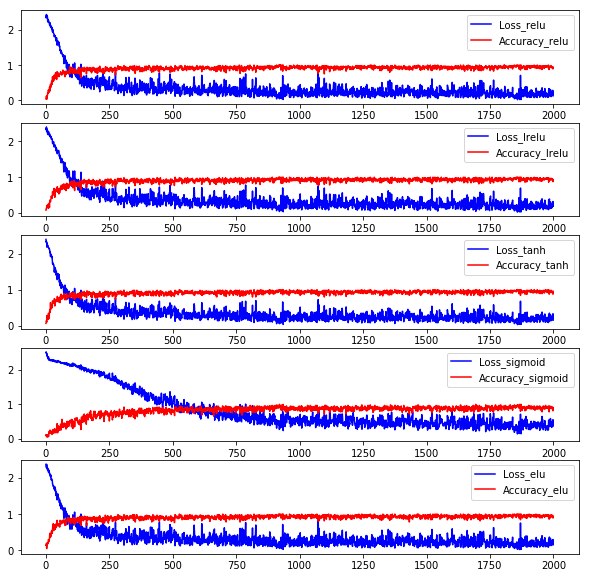

In [52]:
printmd('**Effects of activation functions**')

pyplot.figure(figsize=(10, 10))
pyplot.subplot(5,1,1)
pyplot.plot(loss_relu, 'b')
pyplot.plot(accuracy_relu, 'r')
pyplot.legend(('Loss_relu', 'Accuracy_relu'), loc='upper right')


pyplot.subplot(5,1,2)
pyplot.plot(loss_lrelu, 'b')
pyplot.plot(accuracy_lrelu, 'r')
pyplot.legend(('Loss_lrelu', 'Accuracy_lrelu'), loc='upper right')

pyplot.subplot(5,1,3)
pyplot.plot(loss_tanh, 'b')
pyplot.plot(accuracy_tanh, 'r')
pyplot.legend(('Loss_tanh', 'Accuracy_tanh'), loc='upper right')


pyplot.subplot(5,1,4)
pyplot.plot(loss_sigmoid, 'b')
pyplot.plot(accuracy_sigmoid, 'r')
pyplot.legend(('Loss_sigmoid', 'Accuracy_sigmoid'), loc='upper right')

pyplot.subplot(5,1,5)
pyplot.plot(loss_elu, 'b')
pyplot.plot(accuracy_elu, 'r')
pyplot.legend(('Loss_elu', 'Accuracy_elu'), loc='upper right')


solvers = [
    ['Activation Type', 'Num iterations', 'Init LR', 'Init Loss', 'Final Loss', 'Init Training-Acc(%)', \
     'Final Training-Acc(%)', 'Final Testing-Acc(%)'],
    ['ReLU', total_iters_relu, base_lr, loss_relu[0], loss_relu[total_iters_relu-1], accuracy_relu[0]*100, \
     accuracy_relu[total_iters_relu-1]*100, np.mean(test_accuracy_relu)*100],
    ['Leaky-ReLU', total_iters_lrelu, base_lr, loss_lrelu[0], loss_lrelu[total_iters_lrelu-1], \
     accuracy_lrelu[0]*100, accuracy_lrelu[total_iters_lrelu-1]*100, np.mean(test_accuracy_lrelu)*100],
    ['TanH', total_iters_tanh, base_lr, loss_tanh[0], loss_tanh[total_iters_tanh-1], \
     accuracy_tanh[0]*100, accuracy_tanh[total_iters_tanh-1]*100, np.mean(test_accuracy_tanh)*100],
    ['Sigmoid', total_iters_sigmoid, base_lr, loss_sigmoid[0], loss_sigmoid[total_iters_sigmoid-1], \
     accuracy_sigmoid[0]*100, accuracy_sigmoid[total_iters_sigmoid-1]*100, np.mean(test_accuracy_sigmoid)*100],
    ['Elu', total_iters_elu, base_lr, loss_elu[0], loss_elu[total_iters_elu-1], accuracy_elu[0]*100, \
     accuracy_elu[total_iters_elu-1]*100, np.mean(test_accuracy_elu)*100]

];
make_table(solvers)
apply_theme('basic')

## 2.6. Applying Function: SoftSign on Mnist classifier

**Training status: Running**  Wait till the process is completed

    Completed iterations: 0 , Total iterations to be completed: 2000
    Completed iterations: 100 , Total iterations to be completed: 2000
    Completed iterations: 200 , Total iterations to be completed: 2000
    Completed iterations: 300 , Total iterations to be completed: 2000
    Completed iterations: 400 , Total iterations to be completed: 2000
    Completed iterations: 500 , Total iterations to be completed: 2000
    Completed iterations: 600 , Total iterations to be completed: 2000
    Completed iterations: 700 , Total iterations to be completed: 2000
    Completed iterations: 800 , Total iterations to be completed: 2000
    Completed iterations: 900 , Total iterations to be completed: 2000
    Completed iterations: 1000 , Total iterations to be completed: 2000
    Completed iterations: 1100 , Total iterations to be completed: 2000
    Completed iterations: 1200 , Total iterations to be completed: 2000
    Completed iterations: 1300 , Total iterations to be completed: 2000
    

**Training status: Completed**

**Testing status: Running**  Wait till the process is completed

    Completed test set: 0 , Total sets to be tested: 1000
    Completed test set: 100 , Total sets to be tested: 1000
    Completed test set: 200 , Total sets to be tested: 1000
    Completed test set: 300 , Total sets to be tested: 1000
    Completed test set: 400 , Total sets to be tested: 1000
    Completed test set: 500 , Total sets to be tested: 1000
    Completed test set: 600 , Total sets to be tested: 1000
    Completed test set: 700 , Total sets to be tested: 1000
    Completed test set: 800 , Total sets to be tested: 1000
    Completed test set: 900 , Total sets to be tested: 1000


**Testing status: Completed**

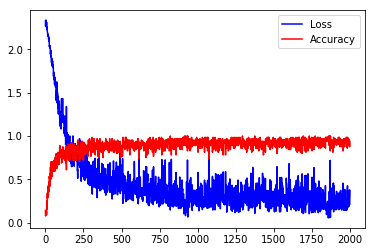

In [54]:
def AddLeNetModel_softsign(model, data):
    '''
    This part is the standard LeNet model: from data to the softmax prediction.
    
    For each convolutional layer we specify dim_in - number of input channels
    and dim_out - number or output channels. Also each Conv and MaxPool layer changes the
    image size. For example, kernel of size 5 reduces each side of an image by 4.

    While when we have kernel and stride sizes equal 2 in a MaxPool layer, it divides
    each side in half.
    '''
    # Image size: 28 x 28 -> 24 x 24
    conv1 = brew.conv(model, data, 'conv1', dim_in=1, dim_out=20, kernel=5)
    # Image size: 24 x 24 -> 12 x 12
    pool1 = model.net.MaxPool(conv1, 'pool1', kernel=2, stride=2)
    # Image size: 12 x 12 -> 8 x 8
    conv2 = brew.conv(model, pool1, 'conv2', dim_in=20, dim_out=50, kernel=5)
    # Image size: 8 x 8 -> 4 x 4
    pool2 = model.net.MaxPool(conv2, 'pool2', kernel=2, stride=2)
    # 50 * 4 * 4 stands for dim_out from previous layer multiplied by the image size
    fc3 = brew.fc(model, pool2, 'fc3', dim_in=50 * 4 * 4, dim_out=500)
    fc3 = model.net.Softsign(fc3, 'softsign')
    pred = brew.fc(model, fc3, 'pred', 500, 10)
    softmax = model.net.Softmax(pred, 'softmax')
    return softmax


train_model = model_helper.ModelHelper(name="mnist_train", arg_scope=arg_scope)
data, label = AddInput(
    train_model, batch_size=64,
    db=os.path.join(data_folder, 'mnist-train-nchw-lmdb'),
    db_type='lmdb')
softmax = AddLeNetModel_softsign(train_model, data)

AddTrainingOperators(train_model, softmax, label)
workspace.ResetWorkspace()
workspace.RunNetOnce(train_model.param_init_net)

workspace.CreateNet(train_model.net, overwrite=True)
total_iters_softsign = 2000
accuracy_softsign = np.zeros(total_iters_softsign)
loss_softsign = np.zeros(total_iters_softsign)
printmd('**Training status: Running**  Wait till the process is completed')
for i in range(total_iters_softsign):
    if(i%100 == 0):
        print "    Completed iterations:", i, ", Total iterations to be completed:", total_iters_softsign
    workspace.RunNet(train_model.net)
    accuracy_softsign[i] = workspace.blobs['accuracy']
    loss_softsign[i] = workspace.blobs['loss']
#print "Training completed"
printmd('**Training status: Completed**')

#print "Testing status: Running"
printmd('**Testing status: Running**  Wait till the process is completed')
test_model = model_helper.ModelHelper(
    name="mnist_test", arg_scope=arg_scope, init_params=False)
data, label = AddInput(
    test_model, batch_size=100,
    db=os.path.join(data_folder, 'mnist-test-nchw-lmdb'),
    db_type='lmdb')
softmax = AddLeNetModel_softsign(test_model, data)
AddAccuracy(test_model, softmax, label)
workspace.RunNetOnce(test_model.param_init_net)
workspace.CreateNet(test_model.net, overwrite=True)
test_iters_softsign = 1000
test_accuracy_softsign = np.zeros(test_iters_softsign)
for i in range(test_iters_softsign):
    if(i%100 == 0):
        print "    Completed test set:", i, ", Total sets to be tested:", test_iters_softsign
    workspace.RunNet(test_model.net.Proto().name)
    test_accuracy_softsign[i] = workspace.FetchBlob('accuracy')
#print "Testing completed"
printmd('**Testing status: Completed**')
# After the execution is done, let's plot the values.
pyplot.plot(loss_softsign, 'b')
pyplot.plot(accuracy_softsign, 'r')
pyplot.legend(('Loss', 'Accuracy'), loc='upper right')

**Effects of activation functions**

Activation Type,Num iterations,Init LR,Init Loss,Final Loss,Init Training-Acc(%),Final Training-Acc(%),Final Testing-Acc(%)
ReLU,2000,0.0010,2.3760,0.1348,4.6875,93.7500,94.7700
Leaky-ReLU,2000,0.0010,2.3561,0.1881,7.8125,92.1875,94.2300
TanH,2000,0.0010,2.4014,0.1518,6.2500,95.3125,94.8000
Sigmoid,2000,0.0010,2.5049,0.3694,10.9375,90.6250,90.1000
Elu,2000,0.0010,2.3737,0.1554,14.0625,93.7500,94.4600
Softsign,2000,0.0010,2.2728,0.2131,14.0625,93.7500,92.8600


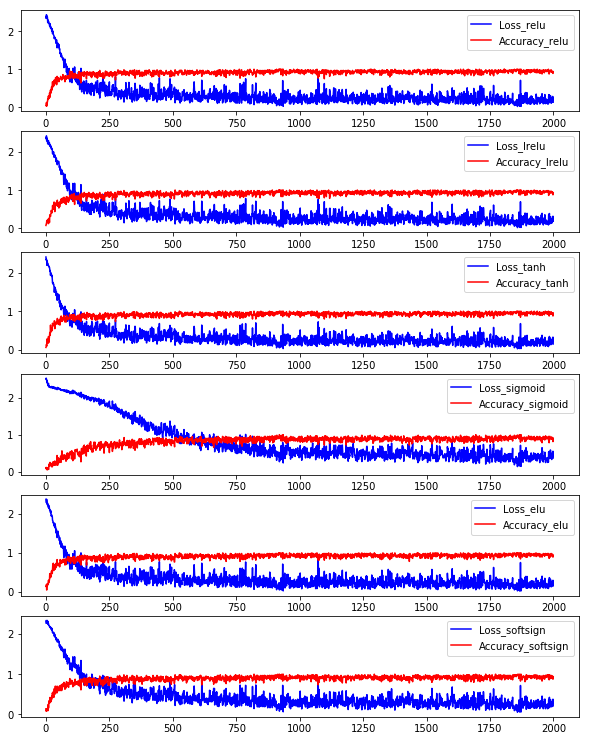

In [55]:
printmd('**Effects of activation functions**')

pyplot.figure(figsize=(10, 13))
pyplot.subplot(6,1,1)
pyplot.plot(loss_relu, 'b')
pyplot.plot(accuracy_relu, 'r')
pyplot.legend(('Loss_relu', 'Accuracy_relu'), loc='upper right')


pyplot.subplot(6,1,2)
pyplot.plot(loss_lrelu, 'b')
pyplot.plot(accuracy_lrelu, 'r')
pyplot.legend(('Loss_lrelu', 'Accuracy_lrelu'), loc='upper right')

pyplot.subplot(6,1,3)
pyplot.plot(loss_tanh, 'b')
pyplot.plot(accuracy_tanh, 'r')
pyplot.legend(('Loss_tanh', 'Accuracy_tanh'), loc='upper right')


pyplot.subplot(6,1,4)
pyplot.plot(loss_sigmoid, 'b')
pyplot.plot(accuracy_sigmoid, 'r')
pyplot.legend(('Loss_sigmoid', 'Accuracy_sigmoid'), loc='upper right')

pyplot.subplot(6,1,5)
pyplot.plot(loss_elu, 'b')
pyplot.plot(accuracy_elu, 'r')
pyplot.legend(('Loss_elu', 'Accuracy_elu'), loc='upper right')

pyplot.subplot(6,1,6)
pyplot.plot(loss_softsign, 'b')
pyplot.plot(accuracy_softsign, 'r')
pyplot.legend(('Loss_softsign', 'Accuracy_softsign'), loc='upper right')


solvers = [
    ['Activation Type', 'Num iterations', 'Init LR', 'Init Loss', 'Final Loss', 'Init Training-Acc(%)', \
     'Final Training-Acc(%)', 'Final Testing-Acc(%)'],
    ['ReLU', total_iters_relu, base_lr, loss_relu[0], loss_relu[total_iters_relu-1], accuracy_relu[0]*100, \
     accuracy_relu[total_iters_relu-1]*100, np.mean(test_accuracy_relu)*100],
    ['Leaky-ReLU', total_iters_lrelu, base_lr, loss_lrelu[0], loss_lrelu[total_iters_lrelu-1], \
     accuracy_lrelu[0]*100, accuracy_lrelu[total_iters_lrelu-1]*100, np.mean(test_accuracy_lrelu)*100],
    ['TanH', total_iters_tanh, base_lr, loss_tanh[0], loss_tanh[total_iters_tanh-1], \
     accuracy_tanh[0]*100, accuracy_tanh[total_iters_tanh-1]*100, np.mean(test_accuracy_tanh)*100],
    ['Sigmoid', total_iters_sigmoid, base_lr, loss_sigmoid[0], loss_sigmoid[total_iters_sigmoid-1], \
     accuracy_sigmoid[0]*100, accuracy_sigmoid[total_iters_sigmoid-1]*100, np.mean(test_accuracy_sigmoid)*100],
    ['Elu', total_iters_elu, base_lr, loss_elu[0], loss_elu[total_iters_elu-1], accuracy_elu[0]*100, \
     accuracy_elu[total_iters_elu-1]*100, np.mean(test_accuracy_elu)*100],
    ['Softsign', total_iters_softsign, base_lr, loss_softsign[0], loss_softsign[total_iters_softsign-1], \
     accuracy_softsign[0]*100, accuracy_softsign[total_iters_softsign-1]*100, np.mean(test_accuracy_softsign)*100]

];
make_table(solvers)
apply_theme('basic')

## 2.6. Applying Function: Softplus on Mnist classifier

**Training status: Running**  Wait till the process is completed

    Completed iterations: 0 , Total iterations to be completed: 2000
    Completed iterations: 100 , Total iterations to be completed: 2000
    Completed iterations: 200 , Total iterations to be completed: 2000
    Completed iterations: 300 , Total iterations to be completed: 2000
    Completed iterations: 400 , Total iterations to be completed: 2000
    Completed iterations: 500 , Total iterations to be completed: 2000
    Completed iterations: 600 , Total iterations to be completed: 2000
    Completed iterations: 700 , Total iterations to be completed: 2000
    Completed iterations: 800 , Total iterations to be completed: 2000
    Completed iterations: 900 , Total iterations to be completed: 2000
    Completed iterations: 1000 , Total iterations to be completed: 2000
    Completed iterations: 1100 , Total iterations to be completed: 2000
    Completed iterations: 1200 , Total iterations to be completed: 2000
    Completed iterations: 1300 , Total iterations to be completed: 2000
    

**Training status: Completed**

**Testing status: Running**  Wait till the process is completed

    Completed test set: 0 , Total sets to be tested: 1000
    Completed test set: 100 , Total sets to be tested: 1000
    Completed test set: 200 , Total sets to be tested: 1000
    Completed test set: 300 , Total sets to be tested: 1000
    Completed test set: 400 , Total sets to be tested: 1000
    Completed test set: 500 , Total sets to be tested: 1000
    Completed test set: 600 , Total sets to be tested: 1000
    Completed test set: 700 , Total sets to be tested: 1000
    Completed test set: 800 , Total sets to be tested: 1000
    Completed test set: 900 , Total sets to be tested: 1000


**Testing status: Completed**

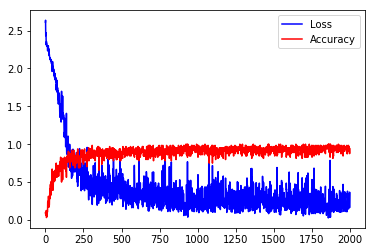

In [56]:
def AddLeNetModel_softplus(model, data):
    '''
    This part is the standard LeNet model: from data to the softmax prediction.
    
    For each convolutional layer we specify dim_in - number of input channels
    and dim_out - number or output channels. Also each Conv and MaxPool layer changes the
    image size. For example, kernel of size 5 reduces each side of an image by 4.

    While when we have kernel and stride sizes equal 2 in a MaxPool layer, it divides
    each side in half.
    '''
    # Image size: 28 x 28 -> 24 x 24
    conv1 = brew.conv(model, data, 'conv1', dim_in=1, dim_out=20, kernel=5)
    # Image size: 24 x 24 -> 12 x 12
    pool1 = model.net.MaxPool(conv1, 'pool1', kernel=2, stride=2)
    # Image size: 12 x 12 -> 8 x 8
    conv2 = brew.conv(model, pool1, 'conv2', dim_in=20, dim_out=50, kernel=5)
    # Image size: 8 x 8 -> 4 x 4
    pool2 = model.net.MaxPool(conv2, 'pool2', kernel=2, stride=2)
    # 50 * 4 * 4 stands for dim_out from previous layer multiplied by the image size
    fc3 = brew.fc(model, pool2, 'fc3', dim_in=50 * 4 * 4, dim_out=500)
    fc3 = model.net.Softplus(fc3, 'softplus')
    pred = brew.fc(model, fc3, 'pred', 500, 10)
    softmax = model.net.Softmax(pred, 'softmax')
    return softmax


train_model = model_helper.ModelHelper(name="mnist_train", arg_scope=arg_scope)
data, label = AddInput(
    train_model, batch_size=64,
    db=os.path.join(data_folder, 'mnist-train-nchw-lmdb'),
    db_type='lmdb')
softmax = AddLeNetModel_softplus(train_model, data)

AddTrainingOperators(train_model, softmax, label)
workspace.ResetWorkspace()
workspace.RunNetOnce(train_model.param_init_net)

workspace.CreateNet(train_model.net, overwrite=True)
total_iters_softplus = 2000
accuracy_softplus = np.zeros(total_iters_softplus)
loss_softplus = np.zeros(total_iters_softplus)
printmd('**Training status: Running**  Wait till the process is completed')
for i in range(total_iters_softplus):
    if(i%100 == 0):
        print "    Completed iterations:", i, ", Total iterations to be completed:", total_iters_softplus
    workspace.RunNet(train_model.net)
    accuracy_softplus[i] = workspace.blobs['accuracy']
    loss_softplus[i] = workspace.blobs['loss']
#print "Training completed"
printmd('**Training status: Completed**')

#print "Testing status: Running"
printmd('**Testing status: Running**  Wait till the process is completed')
test_model = model_helper.ModelHelper(
    name="mnist_test", arg_scope=arg_scope, init_params=False)
data, label = AddInput(
    test_model, batch_size=100,
    db=os.path.join(data_folder, 'mnist-test-nchw-lmdb'),
    db_type='lmdb')
softmax = AddLeNetModel_softplus(test_model, data)
AddAccuracy(test_model, softmax, label)
workspace.RunNetOnce(test_model.param_init_net)
workspace.CreateNet(test_model.net, overwrite=True)
test_iters_softplus = 1000
test_accuracy_softplus = np.zeros(test_iters_softplus)
for i in range(test_iters_softplus):
    if(i%100 == 0):
        print "    Completed test set:", i, ", Total sets to be tested:", test_iters_softplus
    workspace.RunNet(test_model.net.Proto().name)
    test_accuracy_softplus[i] = workspace.FetchBlob('accuracy')
#print "Testing completed"
printmd('**Testing status: Completed**')
# After the execution is done, let's plot the values.
pyplot.plot(loss_softplus, 'b')
pyplot.plot(accuracy_softplus, 'r')
pyplot.legend(('Loss', 'Accuracy'), loc='upper right')

**Effects of activation functions**

Activation Type,Num iterations,Init LR,Init Loss,Final Loss,Init Training-Acc(%),Final Training-Acc(%),Final Testing-Acc(%)
ReLU,2000,0.0010,2.3760,0.1348,4.6875,93.7500,94.7700
Leaky-ReLU,2000,0.0010,2.3561,0.1881,7.8125,92.1875,94.2300
TanH,2000,0.0010,2.4014,0.1518,6.2500,95.3125,94.8000
Sigmoid,2000,0.0010,2.5049,0.3694,10.9375,90.6250,90.1000
Elu,2000,0.0010,2.3737,0.1554,14.0625,93.7500,94.4600
Softsign,2000,0.0010,2.2728,0.2131,14.0625,93.7500,92.8600
Softplus,2000,0.0010,2.6113,0.1672,9.3750,93.7500,93.6600


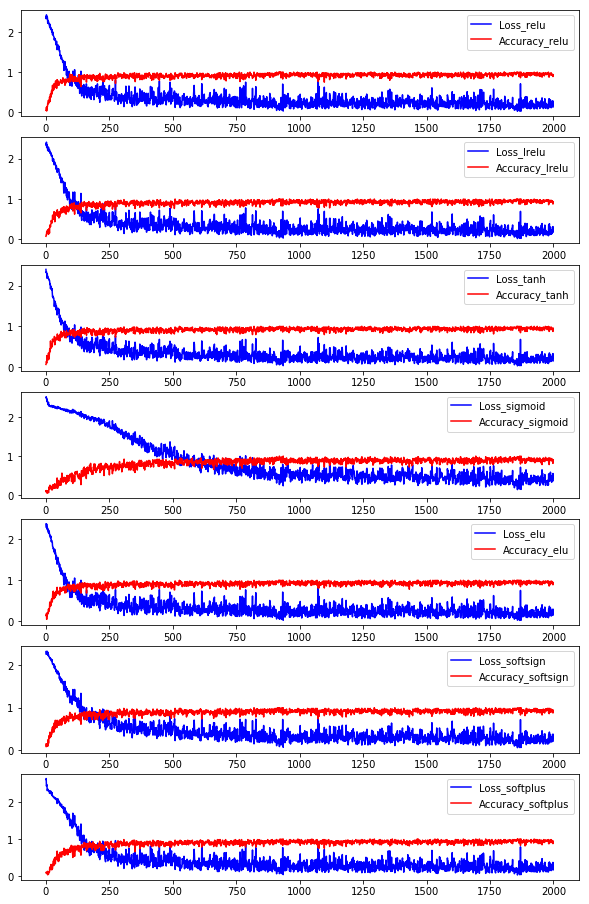

In [58]:
printmd('**Effects of activation functions**')

pyplot.figure(figsize=(10, 16))
pyplot.subplot(7,1,1)
pyplot.plot(loss_relu, 'b')
pyplot.plot(accuracy_relu, 'r')
pyplot.legend(('Loss_relu', 'Accuracy_relu'), loc='upper right')


pyplot.subplot(7,1,2)
pyplot.plot(loss_lrelu, 'b')
pyplot.plot(accuracy_lrelu, 'r')
pyplot.legend(('Loss_lrelu', 'Accuracy_lrelu'), loc='upper right')

pyplot.subplot(7,1,3)
pyplot.plot(loss_tanh, 'b')
pyplot.plot(accuracy_tanh, 'r')
pyplot.legend(('Loss_tanh', 'Accuracy_tanh'), loc='upper right')


pyplot.subplot(7,1,4)
pyplot.plot(loss_sigmoid, 'b')
pyplot.plot(accuracy_sigmoid, 'r')
pyplot.legend(('Loss_sigmoid', 'Accuracy_sigmoid'), loc='upper right')

pyplot.subplot(7,1,5)
pyplot.plot(loss_elu, 'b')
pyplot.plot(accuracy_elu, 'r')
pyplot.legend(('Loss_elu', 'Accuracy_elu'), loc='upper right')

pyplot.subplot(7,1,6)
pyplot.plot(loss_softsign, 'b')
pyplot.plot(accuracy_softsign, 'r')
pyplot.legend(('Loss_softsign', 'Accuracy_softsign'), loc='upper right')


pyplot.subplot(7,1,7)
pyplot.plot(loss_softplus, 'b')
pyplot.plot(accuracy_softplus, 'r')
pyplot.legend(('Loss_softplus', 'Accuracy_softplus'), loc='upper right')


solvers = [
    ['Activation Type', 'Num iterations', 'Init LR', 'Init Loss', 'Final Loss', 'Init Training-Acc(%)', \
     'Final Training-Acc(%)', 'Final Testing-Acc(%)'],
    ['ReLU', total_iters_relu, base_lr, loss_relu[0], loss_relu[total_iters_relu-1], accuracy_relu[0]*100, \
     accuracy_relu[total_iters_relu-1]*100, np.mean(test_accuracy_relu)*100],
    ['Leaky-ReLU', total_iters_lrelu, base_lr, loss_lrelu[0], loss_lrelu[total_iters_lrelu-1], \
     accuracy_lrelu[0]*100, accuracy_lrelu[total_iters_lrelu-1]*100, np.mean(test_accuracy_lrelu)*100],
    ['TanH', total_iters_tanh, base_lr, loss_tanh[0], loss_tanh[total_iters_tanh-1], \
     accuracy_tanh[0]*100, accuracy_tanh[total_iters_tanh-1]*100, np.mean(test_accuracy_tanh)*100],
    ['Sigmoid', total_iters_sigmoid, base_lr, loss_sigmoid[0], loss_sigmoid[total_iters_sigmoid-1], \
     accuracy_sigmoid[0]*100, accuracy_sigmoid[total_iters_sigmoid-1]*100, np.mean(test_accuracy_sigmoid)*100],
    ['Elu', total_iters_elu, base_lr, loss_elu[0], loss_elu[total_iters_elu-1], accuracy_elu[0]*100, \
     accuracy_elu[total_iters_elu-1]*100, np.mean(test_accuracy_elu)*100],
    ['Softsign', total_iters_softsign, base_lr, loss_softsign[0], loss_softsign[total_iters_softsign-1], \
     accuracy_softsign[0]*100, accuracy_softsign[total_iters_softsign-1]*100, np.mean(test_accuracy_softsign)*100],
    ['Softplus', total_iters_softplus, base_lr, loss_softplus[0], loss_softplus[total_iters_softplus-1], \
     accuracy_softplus[0]*100, accuracy_softplus[total_iters_softplus-1]*100, np.mean(test_accuracy_softplus)*100]

];
make_table(solvers)
apply_theme('basic')